In [5]:
import cv2
import os
import numpy as np
import pandas as pd

In [21]:
face_cascade = cv2.CascadeClassifier('C:/FYP/haarcascade_frontalface_default.xml')
kernel = np.ones((5,5),np.float32)/25
path= "C:/FYP/try"
for i in os.listdir(path):
    for j in os.listdir(path+"/"+i):
        img=cv2.imread(path+"//"+i+"//"+j)
        print(j)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(img, 1.1, 4)
        # Grayscale conversion
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Histogram equalization
        img = cv2.equalizeHist(img)
        for (x, y, w, h) in faces: 
            img = img[y:y+h,x:x+w]
            # img_ = img
        try:
            #Resizing/Normalizing
            img_ = cv2.resize(img,(48, 48))
            #Mean Filtering
            img_ = cv2.filter2D(img_,-1,kernel)
        except Exception as e:
            print("Exception: "+str(e))
            # break
        os.chdir("C:/FYP/train"+"/"+i)
        cv2.imwrite(j,img_)
    os.chdir("C:/FYP")

aa048t2aaunaff001.png
aa048t2aaunaff002.png
aa048t2aaunaff003.png
aa048t2aaunaff005.png
aa048t2aaunaff006.png
aa048t2aaunaff007.png
aa048t2aaunaff009.png
aa048t2aaunaff010.png
aa048t2aaunaff011.png
aa048t2aaunaff013.png
aa048t2aaunaff014.png
aa048t2aaunaff015.png
aa048t2aaunaff017.png
aa048t2aaunaff018.png
aa048t2aaunaff019.png
aa048t2aeaff058.png
aa048t2aeaff062.png
aa048t2aeaff066.png
aa048t2aeaff074.png
aa048t2aeaff076.png
aa048t2aeaff098.png
aa048t2aeunaff019.png
aa048t2aeunaff024.png
aa048t2aeunaff029.png
aa048t2aeunaff034.png
aa048t2aiunaff015.png
aa048t2aiunaff016.png
aa048t2aiunaff017.png
aa048t2aiunaff018.png
ak064t1aaaff028.png
ak064t1aaaff029.png
ak064t1aaaff030.png
ak064t1aaaff031.png
ak064t1aaaff032.png
ak064t1aaaff033.png
ak064t1aaaff034.png
ak064t1aaaff084.png
ak064t1aaaff085.png
ak064t1aaaff086.png
ak064t1aaaff087.png
ak064t1aaaff106.png
ak064t1aaaff107.png
ak064t1aaaff108.png
ak064t1aaaff210.png
ak064t1aaaff211.png
ak064t1aaaff212.png
ak064t1aaaff213.png
ak064t1aaaff21

In [22]:
from keras.preprocessing.image import ImageDataGenerator
picture_size = 48
folder_path = "C:/FYP/"
batch_size  = 64

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation1",
                                              target_size = (picture_size,picture_size),
                                              
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 4762 images belonging to 10 classes.
Found 436 images belonging to 10 classes.


In [25]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
no_of_classes = 10

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
# model.add(Conv2D(512,(3,3),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

#4th CNN layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# model.add(Dense(1028))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [26]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
# history = model.fit(train_set, epochs=48,
#                               callbacks=callbacks_list,steps_per_epoch=50,
#                                validation_steps = None
#                               )
model.save("model.h5")

Epoch 1/48


C:\Users\AT\AppData\Local\Temp\ipykernel_2424\2022165066.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


74/74 [==============================] - 86s 1s/step - loss: 1.7456 - accuracy: 0.3861 - val_loss: 7.4209 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 2/48
74/74 [==============================] - 76s 1s/step - loss: 1.2099 - accuracy: 0.5602 - val_loss: 2.9268 - val_accuracy: 0.2734 - lr: 0.0010
Epoch 3/48
74/74 [==============================] - 75s 1s/step - loss: 1.0257 - accuracy: 0.6135 - val_loss: 0.8401 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/48
74/74 [==============================] - 74s 1000ms/step - loss: 0.9001 - accuracy: 0.6562 - val_loss: 0.9580 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 5/48
74/74 [==============================] - 76s 1s/step - loss: 0.8075 - accuracy: 0.6899 - val_loss: 0.8563 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 6/48
74/74 [==============================] - 78s 1s/step - loss: 0.7501 - accuracy: 0.6999 - val_loss: 0.5995 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 7/48
74/74 [==============================] - 77s 1s/step - loss: 0.6672 - accuracy

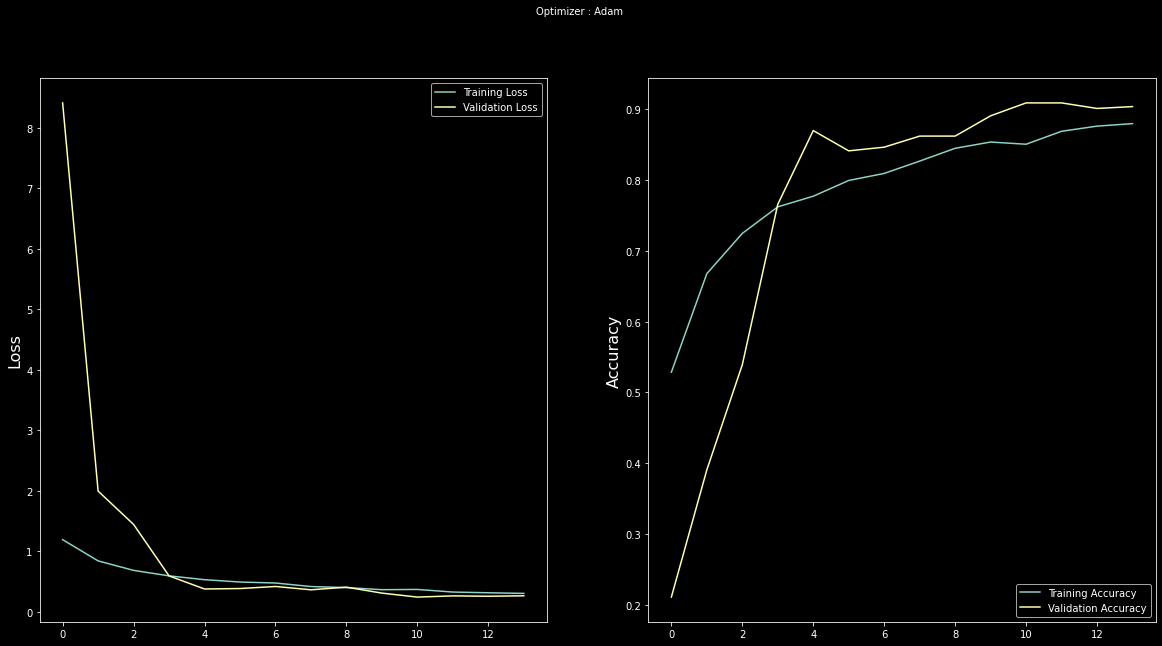

In [13]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [29]:
test_path="C:/FYP/test1/"
x_test=[]
from keras.preprocessing.image import ImageDataGenerator
for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        # img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

test_x=np.array(x_test)
test_datagen = ImageDataGenerator()
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (48, 48),
                                            batch_size = 64,
                                            class_mode = "categorical")
test_labels=test_set.classes

Found 460 images belonging to 10 classes.


In [30]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
# test_labels=test_set.classes
model = load_model("model.h5")
test_loss= model.evaluate(test_set)
prediction=model.predict(test_set)
prediction=np.argmax(prediction,axis=1)
print(classification_report(prediction,test_labels))
from sklearn import metrics
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(test_labels,prediction))

8/8 [==============================] - 2s 215ms/step
              precision    recall  f1-score   support

           0       0.18      0.18      0.18        50
           1       0.02      0.03      0.02        31
           2       0.04      0.67      0.08         3
           3       0.00      0.00      0.00        53
           4       0.10      0.07      0.08        69
           5       0.19      0.14      0.16        74
           6       0.08      0.09      0.08        44
           7       0.08      0.08      0.08        52
           8       0.15      0.12      0.13        69
           9       0.04      0.13      0.06        15

    accuracy                           0.10       460
   macro avg       0.09      0.15      0.09       460
weighted avg       0.11      0.10      0.10       460

[[ 9  4  0  6  6  6  7  2  7  3]
 [ 4  1  0  9  7  8  7  4  9  1]
 [ 6  5  2  1  4  5  6  8 11  2]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 4  2  0  6  5 15  2  8  7  1]
 [ 7  4  0  8  9 10  3 

c:\Users\AT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier